<a href="https://colab.research.google.com/github/Tverdostup1993/Python_for_ds_tasks/blob/main/%D0%A2%D0%B2%D0%B5%D1%80%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF_%D0%9E_%D0%86_%22HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [ ]:
# Посилання на файл у GitHub:
#https://github.com/Tverdostup1993/Python_for_ds_tasks/blob/main/bank_churn_preprocessing.py


In [ ]:
from bank_churn_preprocessing import preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
from bank_churn_preprocessing import preprocess_data

df = pd.read_csv("train.csv")

X_train, y_train, X_val, y_val, input_cols, scaler, encoder = preprocess_data(df)


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

print(f"Train AUC: {train_auc:.3f}")
print(f"Validation AUC: {val_auc:.3f}")


Train AUC: 1.000
Validation AUC: 0.761


In [ ]:
print("Tree depth:", model.get_depth())


Tree depth: 23


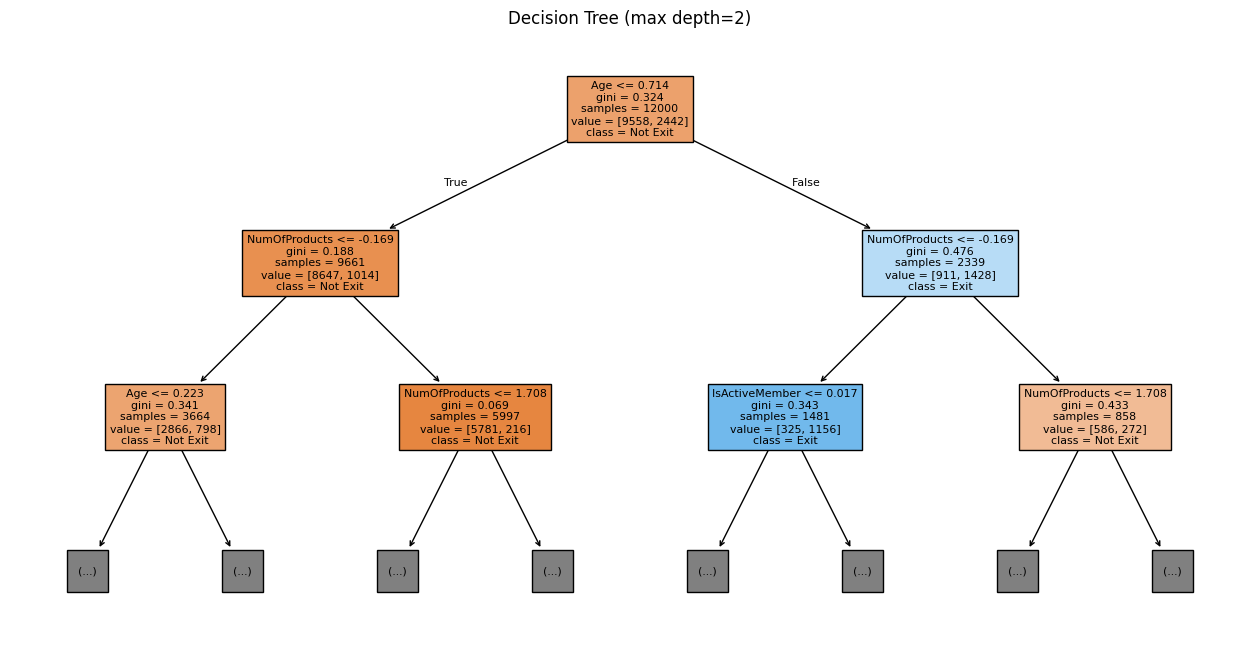

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(model,
          feature_names=input_cols,
          class_names=["Not Exit", "Exit"],
          max_depth=2,
          filled=True)
plt.title("Decision Tree (max depth=2)")
plt.show()


,feature,importance
3,Age,0.339715
6,NumOfProducts,0.168379
9,EstimatedSalary,0.075879
1,CustomerId,0.075051
0,id,0.073747
5,Balance,0.072693
2,CreditScore,0.070632
4,Tenure,0.038542
8,IsActiveMember,0.033198
11,Geography_Germany,0.015516


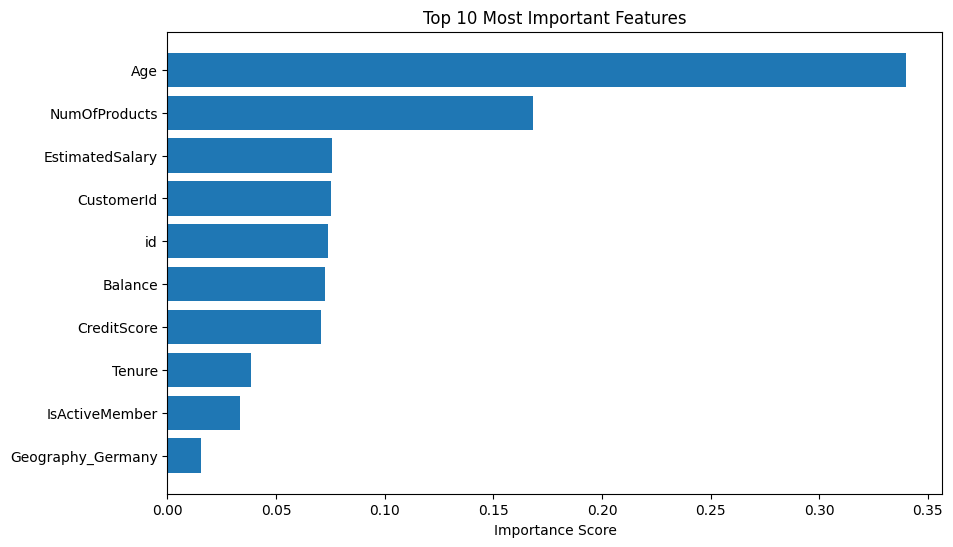

In [ ]:
importance_df = pd.DataFrame({
    "feature": input_cols,
    "importance": model.feature_importances_
})

top_features = importance_df.sort_values(by="importance", ascending=False).head(10)

# Табличка
display(top_features)

# Барплот
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

Train AUC = 1, модель запамʼятала дані, перенавчання моделі

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

def try_params(max_depth=None, max_leaf_nodes=None):
    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=max_depth,
        max_leaf_nodes=max_leaf_nodes
    )
    model.fit(X_train, y_train)

    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    print(f"max_depth={max_depth}, max_leaf_nodes={max_leaf_nodes} => "
          f"Train AUC: {train_auc:.3f}, Val AUC: {val_auc:.3f}")

    return model, train_auc, val_auc


In [ ]:
try_params(max_depth=3)
try_params(max_depth=4)
try_params(max_depth=5)
try_params(max_depth=6)
try_params(max_depth=4, max_leaf_nodes=10)
try_params(max_depth=6, max_leaf_nodes=20)
try_params(max_depth=8, max_leaf_nodes=25)
try_params(max_leaf_nodes=15)
try_params(max_leaf_nodes=30)
try_params(max_depth=10, max_leaf_nodes=40)


max_depth=3, max_leaf_nodes=None => Train AUC: 0.897, Val AUC: 0.891
max_depth=4, max_leaf_nodes=None => Train AUC: 0.911, Val AUC: 0.911
max_depth=5, max_leaf_nodes=None => Train AUC: 0.926, Val AUC: 0.923
max_depth=6, max_leaf_nodes=None => Train AUC: 0.934, Val AUC: 0.919
max_depth=4, max_leaf_nodes=10 => Train AUC: 0.901, Val AUC: 0.900
max_depth=6, max_leaf_nodes=20 => Train AUC: 0.918, Val AUC: 0.917
max_depth=8, max_leaf_nodes=25 => Train AUC: 0.920, Val AUC: 0.919
max_depth=None, max_leaf_nodes=15 => Train AUC: 0.914, Val AUC: 0.913
max_depth=None, max_leaf_nodes=30 => Train AUC: 0.922, Val AUC: 0.917
max_depth=10, max_leaf_nodes=40 => Train AUC: 0.929, Val AUC: 0.921


(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40, random_state=42),
 np.float64(0.9293959470513142),
 np.float64(0.921128335276768))

In [ ]:
model = DecisionTreeClassifier(
    max_depth=10,
    max_leaf_nodes=40,
    random_state=42
)

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc_scores = []
val_auc_scores = []
depths = list(range(1, 21))

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(y_train, train_probs)
    val_auc = roc_auc_score(y_val, val_probs)

    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

    print(f"Depth={d:2d} | Train AUC={train_auc:.3f} | Val AUC={val_auc:.3f}")


Depth= 1 | Train AUC=0.745 | Val AUC=0.735
Depth= 2 | Train AUC=0.843 | Val AUC=0.846
Depth= 3 | Train AUC=0.897 | Val AUC=0.891
Depth= 4 | Train AUC=0.911 | Val AUC=0.911
Depth= 5 | Train AUC=0.926 | Val AUC=0.923
Depth= 6 | Train AUC=0.934 | Val AUC=0.919
Depth= 7 | Train AUC=0.942 | Val AUC=0.917
Depth= 8 | Train AUC=0.950 | Val AUC=0.909
Depth= 9 | Train AUC=0.961 | Val AUC=0.874
Depth=10 | Train AUC=0.971 | Val AUC=0.842
Depth=11 | Train AUC=0.980 | Val AUC=0.825
Depth=12 | Train AUC=0.988 | Val AUC=0.818
Depth=13 | Train AUC=0.994 | Val AUC=0.810
Depth=14 | Train AUC=0.997 | Val AUC=0.796
Depth=15 | Train AUC=0.999 | Val AUC=0.787
Depth=16 | Train AUC=0.999 | Val AUC=0.780
Depth=17 | Train AUC=1.000 | Val AUC=0.772
Depth=18 | Train AUC=1.000 | Val AUC=0.765
Depth=19 | Train AUC=1.000 | Val AUC=0.764
Depth=20 | Train AUC=1.000 | Val AUC=0.767


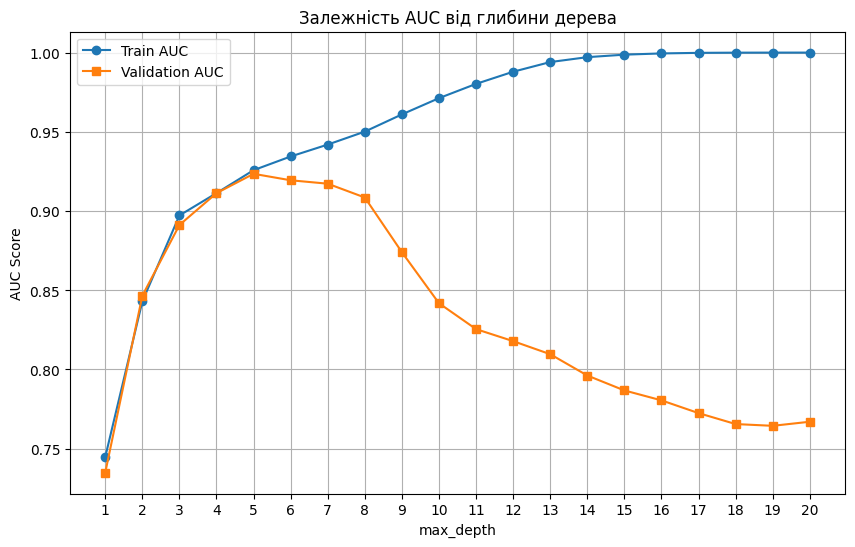

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_auc_scores, label="Train AUC", marker='o')
plt.plot(depths, val_auc_scores, label="Validation AUC", marker='s')
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.title("Залежність AUC від глибини дерева")
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [ ]:
import pandas as pd
from bank_churn_preprocessing import preprocess_data, preprocess_new_data
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Навчальні дані (train.csv)
train_df = pd.read_csv("train.csv")

# Тестові дані змагання
test_df = pd.read_csv("test.csv")


In [ ]:
# Обробка train
X_train, y_train, _, _, input_cols, scaler, encoder = preprocess_data(train_df)

# Обробка test
X_test = preprocess_new_data(test_df, input_cols=input_cols, scaler=scaler, encoder=encoder)


In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
test_probs = model.predict_proba(X_test)[:, 1]  # Отримуємо ймовірності виходу


In [ ]:
submission = pd.DataFrame({
    "id": test_df["id"],  # або "Id", залежно від назви в файлі
    "Exited": test_probs
})

submission.to_csv("submission.csv", index=False)
